In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sb


## Preprocessing: 
 - Loading and cleaning the Elections data into 8 different Dataframes:
 
 - feature Engineering. divide all parties from each dataframe into 5 classes: Arabs, Orthodox, Right, Left, Center
 
 -

In [2]:
knesset21elections = pd.read_excel(r"Knesset Elections\-21-.xlsx")
knesset21elections = knesset21elections.drop("מספר קלפי", axis=1)
knesset21elections = knesset21elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset20elections = pd.read_excel(r"Knesset Elections\-20-.xlsx")
knesset20elections = knesset20elections.drop("מספר קלפי", axis=1)
knesset20elections = knesset20elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

knesset19elections = pd.read_excel(r"Knesset Elections\-19-.xlsx")
knesset19elections = knesset19elections.drop("מספר קלפי", axis=1)
knesset19elections = knesset19elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

knesset18elections = pd.read_excel(r"Knesset Elections\-18-.xlsx")
knesset18elections = knesset18elections.drop("סמל קלפי", axis=1)
knesset18elections = knesset18elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

knesset17elections = pd.read_excel(r"Knesset Elections\-17-2006.xls")
knesset17elections = knesset17elections.drop("מספר קלפי", axis=1)
knesset17elections = knesset17elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset16elections = pd.read_excel(r"Knesset Elections\-16-2003.xls")
knesset16elections = knesset16elections.drop("סמל קלפי", axis=1)
knesset16elections = knesset16elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset15elections = pd.read_excel(r"Knesset Elections\-15-1999-.xls")
knesset15elections = knesset15elections.drop("מס' רץ", axis=1).drop("קלפי", axis=1).drop("פיצול", axis=1).drop("נפה", axis=1)
knesset15elections = knesset15elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset14elections = pd.read_excel(r"Knesset Elections\-14-1996-.xls")
knesset14elections = knesset14elections.drop("סמל קלפי", axis=1).drop("כתובת", axis=1).drop("פיצול", axis=1)
knesset14elections = knesset14elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

In [3]:
def totalSum(electionDataframe):
    return electionDataframe["Arabs"] + electionDataframe["Center"] + electionDataframe["Left"] + electionDataframe["Right"] + electionDataframe["Orthodox"]

def classified_summed_votes_list(electionsDataframe):
    return [electionsDataframe["Arabs"].sum(), electionsDataframe["Center"].sum(), electionsDataframe["Left"].sum(), electionsDataframe["Right"].sum(), electionsDataframe["Orthodox"].sum()]

def divideParties_into5classes(electionDataframe):
    arabs = []
    orthodox = []
    right = []
    left = []
    center = []
    
    if(electionDataframe.columns.contains("דעם")):
        arabs += ["דעם"]
    if(electionDataframe.columns.contains("ודעם")):
        arabs += ["ודעם"] 
    if(electionDataframe.columns.contains("עם")):
        arabs += ["עם"]
    if(electionDataframe.columns.contains("ום")):
        arabs += ["ום"]
    if(electionDataframe.columns.contains("ע")):
        arabs += ["ע"]
    if(electionDataframe.columns.contains("ו")):
        arabs += ["ו"]
    if(electionDataframe.columns.contains("ד")):
        arabs += ["ד"]
        
    if(electionDataframe.columns.contains("שס")):
        orthodox += ["שס"]
    if(electionDataframe.columns.contains("ג")):
        orthodox += ["ג"]

    if(electionDataframe.columns.contains("מחל")):
        right += ["מחל"]
    if(electionDataframe.columns.contains("ל")):
        right += ["ל"]
    if(electionDataframe.columns.contains("טב")):
        right += ["טב"]
    if(electionDataframe.columns.contains("כ")):
        right += ["כ"]
    if(electionDataframe.columns.contains("ט")):
        right += ["ט"]
    if(electionDataframe.columns.contains("ב")):
        right += ["ב"]        
    if(electionDataframe.columns.contains("יט")):
        right += ["יט"]        
           
    if(electionDataframe.columns.contains("אמת")):
        left += ["אמת"]
    if(electionDataframe.columns.contains("מרצ")):
        left += ["מרצ"]
    if(electionDataframe.columns.contains("מרץ")):
        left += ["מרץ"]
    if(electionDataframe.columns.contains("צפ")):
        left += ["צפ"]
    if(electionDataframe.columns.contains("ם")):
        left += ["ם"]
    if(electionDataframe.columns.contains("זך")):
        left += ["זך"]
                   
    if(electionDataframe.columns.contains("כן")):
        center += ["כן"]
    if(electionDataframe.columns.contains("פה")):
        center += ["פה"]
    if(electionDataframe.columns.contains("הד")):
        center += ["הד"]
    if(electionDataframe.columns.contains("יש")):
        center += ["יש"]
        
    electionDataframe["Arabs"] = 0
    for party_name in arabs:
        electionDataframe["Arabs"] += electionDataframe[party_name]
    
    electionDataframe["Left"] = 0
    for party_name in left:
        electionDataframe["Left"] += electionDataframe[party_name]
    
    electionDataframe["Right"] = 0
    for party_name in right:
        electionDataframe["Right"] += electionDataframe[party_name]
    
    electionDataframe["Center"] = 0
    for party_name in center:
        electionDataframe["Center"] += electionDataframe[party_name]
    
    electionDataframe["Orthodox"] = 0
    for party_name in orthodox:
        electionDataframe["Orthodox"] += electionDataframe[party_name]
    
    afterclassifiying = totalSum(electionDataframe)
    lost_votes = electionDataframe["כשרים"].sum() - afterclassifiying.sum() 
    print("lost votes: ",lost_votes)
    print(arabs,center,left,right,orthodox)
    cols_to_drop = np.arange(4,len(electionDataframe.columns)-5)
    
    return electionDataframe.drop(electionDataframe.columns[cols_to_drop], axis=1)

In [4]:

#=============  21 ====================

knesset21elections = divideParties_into5classes(knesset21elections)
# knesset21elections.to_csv("knesset21elections.csv", sep=',', encoding='utf-8')
# knesset21elections = pd.read_csv("knesset21elections.csv")
#=============  20 ====================

knesset20elections = divideParties_into5classes(knesset20elections)
# knesset20elections.to_csv("knesset20elections.csv", sep=',', encoding='utf-8')
# knesset20elections = pd.read_csv("knesset20elections.csv")
#============= 19 ===========================

knesset19elections = divideParties_into5classes(knesset19elections)
# knesset19elections.to_csv("knesset19elections.csv", sep=',', encoding='utf-8')
# knesset19elections = pd.read_csv("knesset19elections.csv")
#============= 18 ===========================

knesset18elections = divideParties_into5classes(knesset18elections)
# knesset18elections.to_csv("knesset18elections.csv", sep=',', encoding='utf-8')
# knesset18elections = pd.read_csv("knesset18elections.csv")
#============= 17 ===========================

knesset17elections = divideParties_into5classes(knesset17elections)
# knesset17elections.to_csv("knesset17elections.csv", sep=',', encoding='utf-8')
# knesset17elections = pd.read_csv("knesset17elections.csv")
#============= 16 ===========================

knesset16elections = divideParties_into5classes(knesset16elections)
# knesset16elections.to_csv("knesset16elections.csv", sep=',', encoding='utf-8')
# knesset16elections = pd.read_csv("knesset16elections.csv")
#============= 15 ===========================

knesset15elections = divideParties_into5classes(knesset15elections)
# knesset15elections.to_csv("knesset15elections.csv", sep=',', encoding='utf-8')
# knesset15elections = pd.read_csv("knesset15elections.csv")
#============= 14 ===========================

knesset14elections = divideParties_into5classes(knesset14elections)
# knesset14elections.to_csv("knesset14elections.csv", sep=',', encoding='utf-8')
# knesset14elections = pd.read_csv("knesset14elections.csv")

lost votes:  365800
['דעם', 'ום'] ['פה'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'טב', 'כ'] ['שס', 'ג']
lost votes:  184974
['ודעם', 'ע'] ['פה'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'טב', 'כ'] ['שס', 'ג']
lost votes:  262820
['עם', 'ו', 'ד'] ['כן', 'פה'] ['אמת', 'מרץ', 'צפ', 'זך'] ['מחל', 'טב'] ['שס', 'ג']
lost votes:  86333
['עם', 'ו', 'ד'] ['כן'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'ט', 'ב'] ['שס', 'ג']
lost votes:  153189
['עם', 'ו', 'ד'] ['כן', 'יש'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'טב', 'כ'] ['שס', 'ג']
lost votes:  128495.0
['עם', 'ו', 'ד'] ['כן', 'פה', 'יש'] ['אמת', 'מרצ', 'ם', 'זך'] ['מחל', 'ל', 'ט', 'ב'] ['שס', 'ג']
lost votes:  169639
['עם', 'ו', 'ד'] ['כן', 'פה', 'הד', 'יש'] ['אמת', 'מרצ', 'ם', 'זך'] ['מחל', 'ל', 'ב', 'יט'] ['שס', 'ג']
lost votes:  75757
['ע', 'ו', 'ד'] ['כן', 'הד'] ['אמת', 'מרץ'] ['מחל', 'ט', 'ב'] ['שס', 'ג']


## Exploratory Data Analysis: 

- charts, stats, and other conclusions

In [5]:
def ahuzey_hatzbaa(electionDF):
    return electionDF["מצביעים"].sum() / electionDF["בזב"].sum()
  

print("Total voting percentage in the 21st Knesset Elections: ", ahuzey_hatzbaa(knesset21elections))
print("Total voting percentage in the 20th Knesset Elections: ", ahuzey_hatzbaa(knesset20elections))
print("Total voting percentage in the 19th Knesset Elections: ", ahuzey_hatzbaa(knesset19elections))
print("Total voting percentage in the 18th Knesset Elections: ", ahuzey_hatzbaa(knesset18elections))
print("Total voting percentage in the 17th Knesset Elections: ", ahuzey_hatzbaa(knesset17elections))
print("Total voting percentage in the 16th Knesset Elections: ", ahuzey_hatzbaa(knesset16elections))
print("Total voting percentage in the 15th Knesset Elections: ", ahuzey_hatzbaa(knesset15elections))
print("Total voting percentage in the 14th Knesset Elections: ", ahuzey_hatzbaa(knesset14elections))

knesset21elections.head(20)


Total voting percentage in the 21st Knesset Elections:  0.6846117554867093
Total voting percentage in the 20th Knesset Elections:  0.7233862477761517
Total voting percentage in the 19th Knesset Elections:  0.6777171515926674
Total voting percentage in the 18th Knesset Elections:  0.625072632084281
Total voting percentage in the 17th Knesset Elections:  0.6359419866443241
Total voting percentage in the 16th Knesset Elections:  0.6561151253153973
Total voting percentage in the 15th Knesset Elections:  0.7616075951538815
Total voting percentage in the 14th Knesset Elections:  0.7579820758914384


,,בזב,מצביעים,פסולים,כשרים,Arabs,Left,Right,Center,Orthodox
שם ישוב,סמל ישוב,,,,,,,,,
אבו ג'ווייעד (שבט),967,1915,275,5,270,188,15,3,50,0
אבו גוש,472,4707,1915,72,1843,858,348,236,334,32
אבו סנאן,473,9234,4845,82,4763,2744,248,844,701,68
אבו עבדון (שבט),958,138,12,0,12,5,5,0,0,0
אבו קורינאת (שבט),968,2927,640,11,629,467,30,14,91,2
אבו קרינאת (יישוב),1342,543,213,4,209,106,15,4,78,2
אבו רובייעה (שבט),966,3919,761,8,753,587,55,11,64,4
אבו רוקייק (שבט),961,4691,1129,13,1116,1025,30,11,26,6
אבו תלול,1375,867,390,4,386,365,5,5,5,1


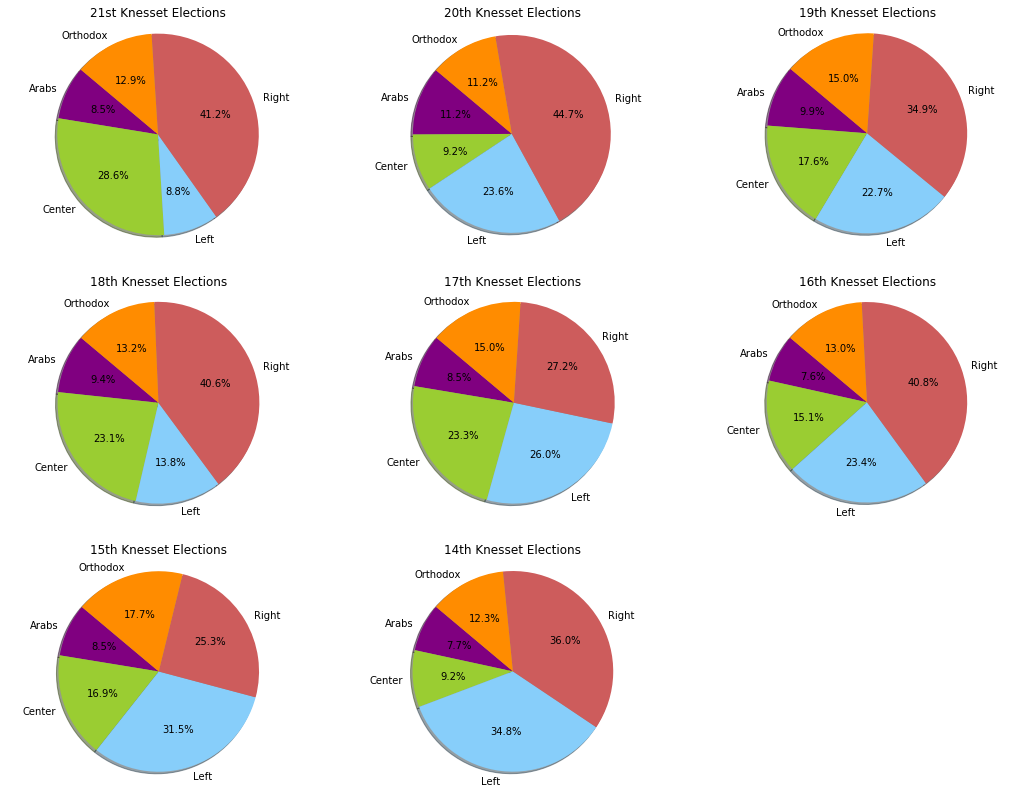

In [9]:
 = "Arabs", "Center", "Left", "Right" , "Orthodox";
colors = ['purple', "yellowgreen" , "lightskyblue", 'indianred', "darkorange" ]

sizes21 = classified_summed_votes_list(knesset21elections)
sizes20 = classified_summed_votes_list(knesset20elections)
sizes19 = classified_summed_votes_list(knesset19elections)
sizes18 = classified_summed_votes_list(knesset18elections)
sizes17 = classified_summed_votes_list(knesset17elections)
sizes16 = classified_summed_votes_list(knesset16elections)
sizes15 = classified_summed_votes_list(knesset15elections)
sizes14 = classified_summed_votes_list(knesset14elections)
 
    
fig = plt.figure(figsize=(18,14))

# Plot 21st Elections
ax1 = plt.subplot(3,3,1)
ax1.pie(sizes21, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('21st Knesset Elections')
ax1.axis('equal')

# Plot 20th Elections
ax2 = plt.subplot(3,3,2)
ax2.pie(sizes20, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('20th Knesset Elections')
ax2.axis('equal')

# Plot 19th Elections
ax3 = plt.subplot(3,3,3)
ax3.pie(sizes19, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax3.set_title('19th Knesset Elections')
ax3.axis('equal')

# Plot 18th Elections
ax4 = plt.subplot(3,3,4)
ax4.pie(sizes18, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('18th Knesset Elections')
ax4.axis('equal')

# Plot 17th Elections
ax4 = plt.subplot(3,3,5)
ax4.pie(sizes17, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('17th Knesset Elections')
ax4.axis('equal')

# Plot 16th Elections
ax4 = plt.subplot(3,3,6)
ax4.pie(sizes16, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('16th Knesset Elections')
ax4.axis('equal')

# Plot 15th Elections
ax4 = plt.subplot(3,3,7)
ax4.pie(sizes15, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('15th Knesset Elections')
ax4.axis('equal')

# Plot 14th Elections
ax4 = plt.subplot(3,3,8)
ax4.pie(sizes14, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('14th Knesset Elections')
ax4.axis('equal')
plt.show()

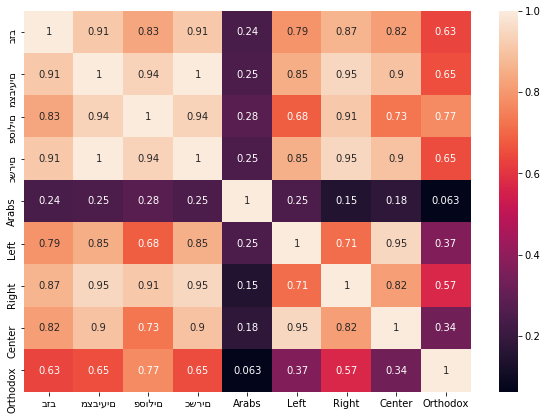

In [12]:
plt.figure(figsize = (10,7))
sb.heatmap(knesset21elections.corr(), annot=True);


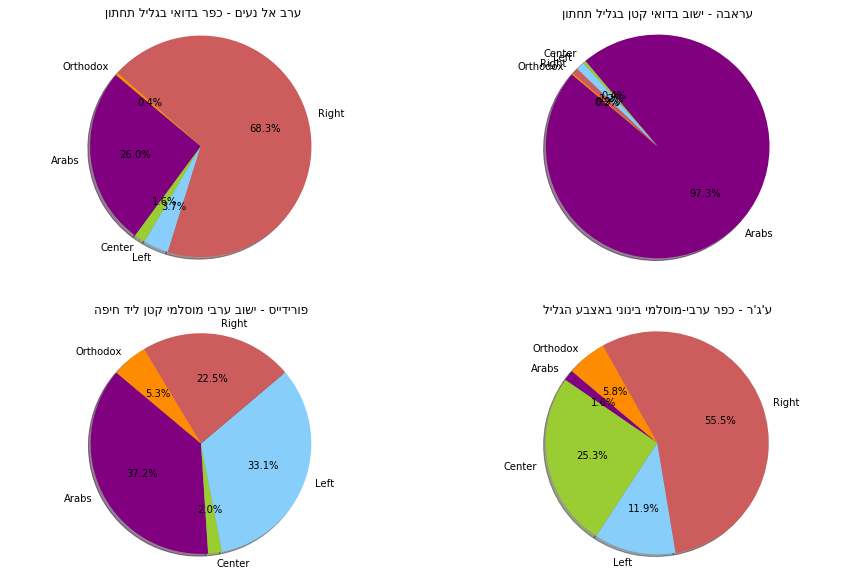

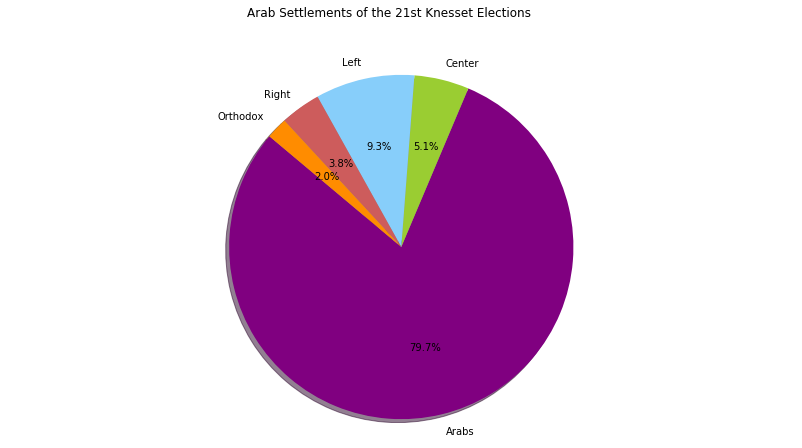

שם ישוב              סמל ישוב
עראבה                531         0.968074
מסעודין אל-עזאזמה    939         0.963215
כאוכב אבו אל-היג'א   505         0.960421
סח'נין               7500        0.946070
אבו תלול             1375        0.945596
שגב-שלום             1286        0.944472
משהד                 520         0.937617
ביר הדאג'            1348        0.935673
טמרה (יזרעאל)        547         0.931034
ערערה-בנגב           1192        0.927716
כאבול                504         0.921897
אום אל-פחם           2710        0.920106
אבו רוקייק (שבט)     961         0.918459
דבוריה               489         0.915467
מג'ד אל-כרום         516         0.912463
הוואשלה (שבט)        1169        0.909836
אכסאל                478         0.900978
אעצם (שבט)           963         0.900318
טייבה                2730        0.892498
עין מאהל             532         0.890994
דייר חנא             492         0.886895
נצאצרה (שבט)         1041        0.881720
רהט                  1161        0.879576
קלנס

In [13]:
fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(2,2,1)
sizes_arabs = classified_summed_votes_list(knesset21elections.loc["ערב אל נעים"])
ax1.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
title = "ערב אל נעים - כפר בדואי בגליל תחתון "
ax1.set_title(title[::-1])
ax1.axis('equal')

ax2 = plt.subplot(2,2,2)
sizes_arabs = classified_summed_votes_list(knesset21elections.loc["עראבה"])
ax2.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
title1 = "עראבה - ישוב בדואי קטן בגליל תחתון"
ax2.set_title(title1[::-1])
ax2.axis('equal')


ax3 = plt.subplot(2,2,3)
sizes_arabs = classified_summed_votes_list(knesset21elections.loc["פוריידיס"])
ax3.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
title2 = "פורידייס - ישוב ערבי מוסלמי קטן ליד חיפה"
ax3.set_title(title2[::-1])
ax3.axis('equal')

ax3 = plt.subplot(2,2,4)
sizes_arabs = classified_summed_votes_list(knesset21elections.loc["ע'ג'ר"])
ax3.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
title3 = "ע'ג'ר - כפר ערבי-מוסלמי בינוני באצבע הגליל"
ax3.set_title(title3[::-1])
ax3.axis('equal')


plt.show()

fig = plt.figure(figsize=(14,7))

fig.suptitle("Arab Settlements of the 21st Knesset Elections")
sizes_arabs = classified_summed_votes_list(knesset21elections[knesset21elections["Arabs"] / knesset21elections["כשרים"] > 0.21])
plt.pie(sizes_arabs, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

arab_settlements = knesset21elections[knesset21elections["Arabs"] / knesset21elections["כשרים"] > 0.21]
(arab_settlements["Arabs"] / arab_settlements["כשרים"]).sort_values(ascending=False)


(5,)


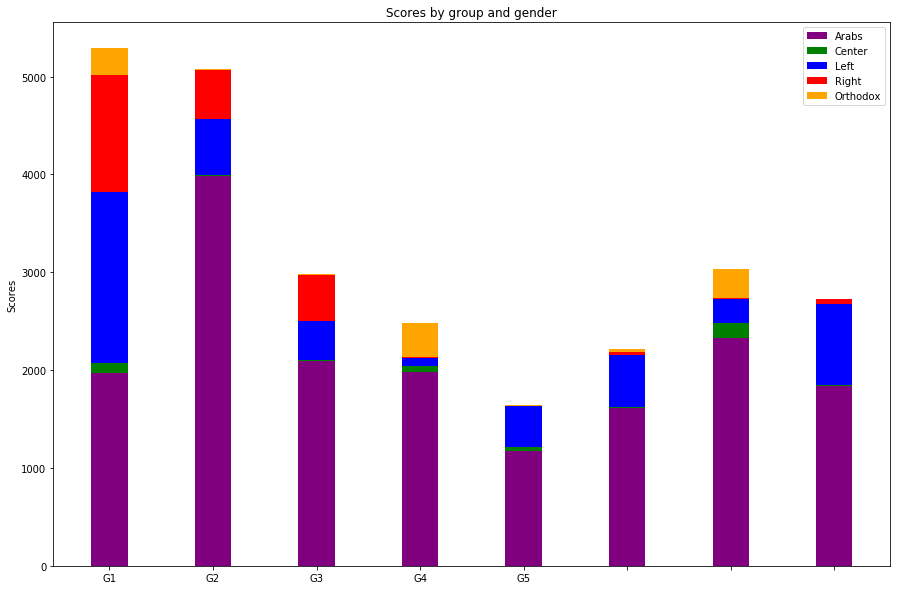

In [154]:
last_8_elections = [knesset21elections, knesset20elections, knesset19elections, knesset18elections, knesset17elections, knesset16elections, knesset15elections, knesset14elections]

fig = plt.figure(figsize=(15,10))
ax3 = plt.subplot(1,1,1)

sizes = np.zeros((5,8))
i=0
print(sizes[:,i].shape)
for election in last_8_elections:
    sizes[:,i] = classified_summed_votes_list(election.loc["פוריידיס"])
    i+=1
sizes

#menMeans = (20, 35, 30, 35, 27)
#womenMeans = (25, 32, 34, 20, 25)
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
indx = np.arange(8)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(indx, sizes[0], width, color="purple")
p2 = plt.bar(indx, sizes[1], width, bottom=sizes[0], color="green")
p3 = plt.bar(indx, sizes[2], width, bottom=sizes[0]+sizes[1], color="Blue")
p4 = plt.bar(indx, sizes[3], width, bottom=sizes[0]+sizes[1]+sizes[2], color="Red")
p5 = plt.bar(indx, sizes[4], width, bottom=sizes[0]+sizes[1]+sizes[2]+sizes[3], color="orange")

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(labels)

plt.show()

# title2 = "פוריידיס - ישוב ערבי מוסלמי %d מצביעים" % int(knesset21elections.loc["פוריידיס"]["מצביעים"])
# ax3.set_title(title2[::-1])
# ax3.axis('equal')

# plt.show()






תל אביב פסולים : 0.00444204691307502



ירושלים פסולים : 0.007836613850280233


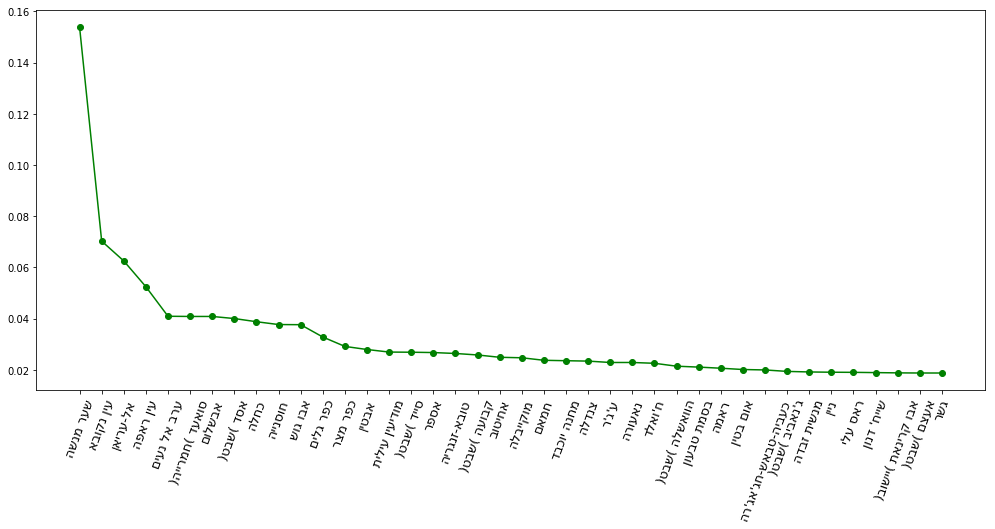

סמל ישוב
921    131
Name: בזב, dtype: int64

In [126]:
psulim_percentage = knesset21elections["פסולים"]/knesset21elections["מצביעים"]
#print(psulim_percentage.sort_values(ascending=False))
print("\n\n")
psulim_percentage = psulim_percentage.sort_values(ascending=False)

print("תל אביב פסולים :", float(psulim_percentage["תל אביב - יפו"]))
print("\n\n")
print("ירושלים פסולים :",float(psulim_percentage["ירושלים"]))


plt.figure(figsize=(17,7))
plt.plot(psulim_percentage.values[:40], "go-")

settlements = []
for name in psulim_percentage.index.get_level_values("שם ישוב"):
    name = name[::-1]
    settlements += [name]

plt.xticks(np.arange(0,40), settlements, rotation=70, size=13)
plt.show()

knesset21elections.loc["שער מנשה"]["בזב"]

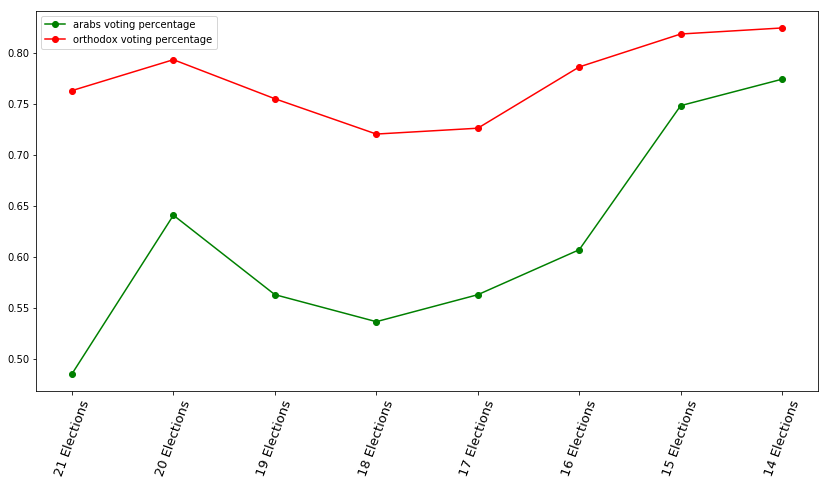

In [87]:
elections = ["21 Elections", "20 Elections", "19 Elections", "18 Elections", "17 Elections", "16 Elections", "15 Elections", "14 Elections"]

def plot_voting_percentage(population, percentage):
    settlements_voting = []
    for election in last_8_elections:
        settlements = election[election[population] / election["כשרים"] > percentage]
        settlements_voting += [settlements['מצביעים'].sum()/settlements['בזב'].sum()]
    return settlements_voting 


arabs_percentage = plot_voting_percentage("Arabs", 0.21)
orthodoxim_percentage = plot_voting_percentage("Orthodox", 0.4)

plt.figure(figsize=(14,7))
plt.plot(arabs_percentage, "go-", orthodoxim_percentage, "or-")
plt.xticks(np.arange(0,8), elections, rotation=70, size=13)
plt.legend(["Arabs voting percentage", "Orthodox voting percentage"])
plt.show()


## Algorithms:

- cluster the datasets with Kmeans
- visualize the data using dimention reduction with PCA
- 

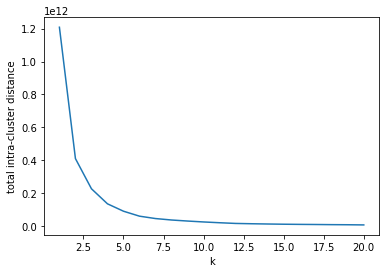

In [115]:
from sklearn.cluster import KMeans

ks = range(1,21)
scores = []

X = knesset21elections[["בזב","מצביעים", "Arabs", "Center", "Left", "Right", "Orthodox"]]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    scores.append(-model.score(X))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')

plt.show()

# best K is around 5

model = KMeans(n_clusters=5)
y = model.fit_predict(X)


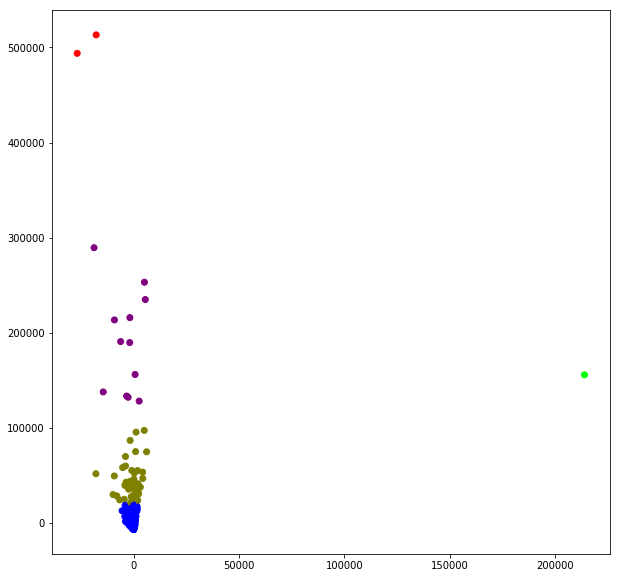

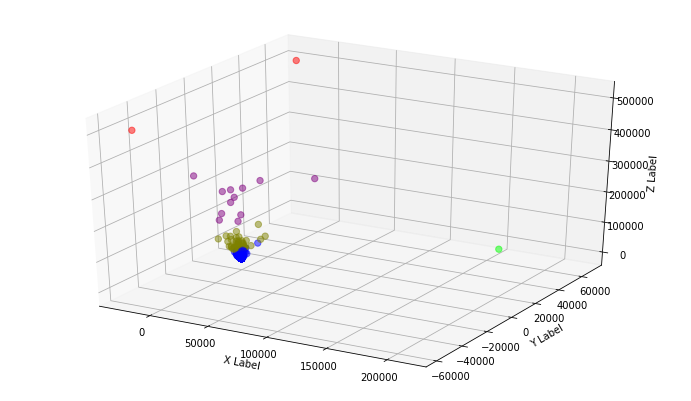

In [116]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=2)
X_new = pca.fit_transform(X)  

plt.figure(figsize=(10,10))
plt.scatter(X_new[:,1], X_new[:,0], c=model.labels_.astype(float),cmap=plt.cm.brg)
plt.show()


pca = PCA(n_components=3)
X_new = pca.fit_transform(X)  

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_new[:,1], X_new[:,2], X_new[:,0],c=model.labels_.astype(float), cmap=plt.cm.brg, marker='o',s=40, alpha=0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [117]:
X[y==0]

,,בזב,מצביעים,Arabs,Center,Left,Right,Orthodox
שם ישוב,סמל ישוב,,,,,,,
אבו ג'ווייעד (שבט),967,1915,275,188,50,15,3,0
אבו גוש,472,4707,1915,858,334,348,236,32
אבו סנאן,473,9234,4845,2744,701,248,844,68
אבו עבדון (שבט),958,138,12,5,0,5,0,0
אבו קורינאת (שבט),968,2927,640,467,91,30,14,2
אבו קרינאת (יישוב),1342,543,213,106,78,15,4,2
אבו רובייעה (שבט),966,3919,761,587,64,55,11,4
אבו רוקייק (שבט),961,4691,1129,1025,26,30,11,6
אבו תלול,1375,867,390,365,5,5,5,1


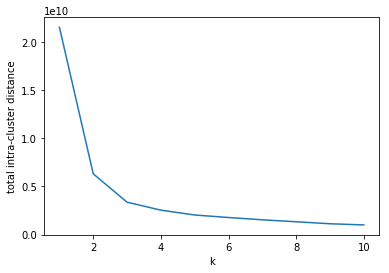

In [118]:
ks = range(1,11)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X[y==0])
    scores.append(-model.score(X[y==0]))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')

plt.show()

# best K is around 4
X = X[y==0]
model = KMeans(n_clusters=4)
y = model.fit_predict(X)

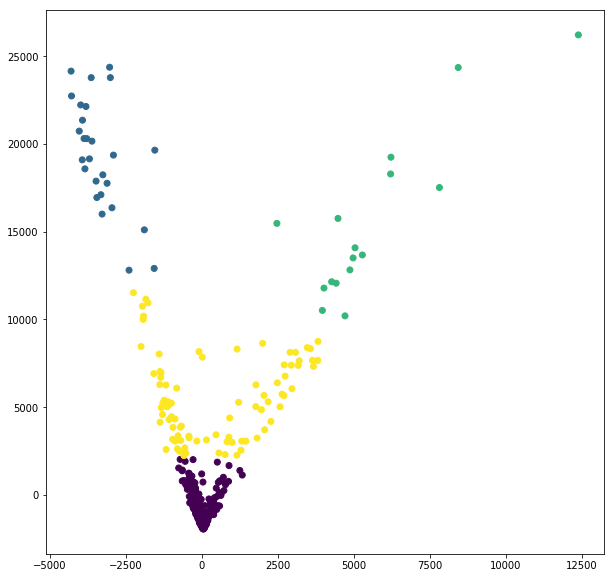

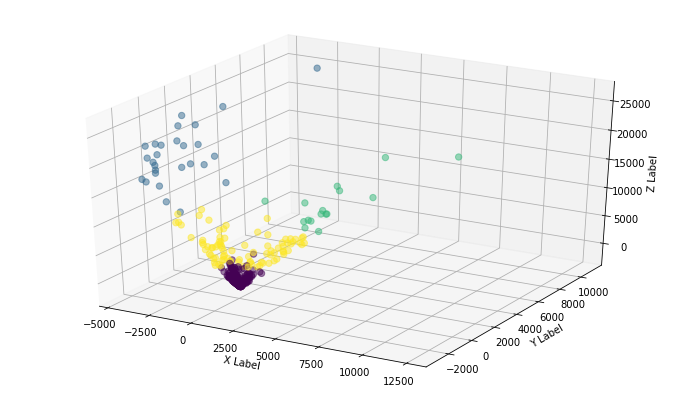

In [119]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)  

plt.figure(figsize=(10,10))
plt.scatter(X_new[:,1], X_new[:,0], c=model.labels_.astype(float))
plt.show()


#################################################

pca = PCA(n_components=3)
X_new = pca.fit_transform(X)  

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_new[:,1], X_new[:,2], X_new[:,0], c=model.labels_.astype(float), marker='o', s=40, alpha=0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


### with several PCA and Kmeans steps we've got interesting clustering of Israeli settlements:

In [124]:
# Medium population Arabic settlements:

X[y==2]

,,בזב,מצביעים,Arabs,Center,Left,Right,Orthodox
שם ישוב,סמל ישוב,,,,,,,
באקה אל-גרביה,6000,18635,7991,6549,305,772,94,39
ג'דיידה-מכר,1292,14098,6293,5319,127,312,63,66
טירה,2720,17873,10661,7325,270,2644,200,12
טמרה,8900,22245,13019,10026,181,883,289,406
יפיע,499,12845,5741,4642,223,421,214,67
כפר כנא,509,14304,6919,5655,157,321,275,84
כפר מנדא,510,12249,7593,5981,76,450,218,724
כפר קאסם,634,14659,9472,5295,227,3664,88,18
כפר קרע,654,12611,5954,4805,139,656,83,74


In [125]:
# Medium population Jewish settlements: // (also include Druze towns which voting habits are similar to Jewish towns - דאלית אל-כרמל)

X[y==1]

,,בזב,מצביעים,Arabs,Center,Left,Right,Orthodox
שם ישוב,סמל ישוב,,,,,,,
אופקים,31,20939,13715,3,905,215,6676,4784
אור עקיבא,1020,15520,9773,4,1221,209,6650,921
אלעד,1309,19997,16927,2,47,12,2493,13930
אריאל,3570,15122,10096,6,1232,156,6861,160
באר יעקב,2530,15773,12021,10,4107,484,5548,751
בית שאן,9200,14180,9906,8,516,112,6365,1659
גבעת זאב,3730,11431,8734,3,802,173,3815,3030
גבעת שמואל,681,17890,13986,20,3187,707,6088,762
גדרה,2550,17315,12813,17,4475,932,5642,480
